In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as img
import splitfolders
import tensorflow as tf
import os

from keras_preprocessing.image import ImageDataGenerator

In [2]:
#Lokasi Folder Gambar
dataset_dir = r'C:\Users\TUF\Documents\.Kulaih_Informatika\Semester5\Praktikum\Kecerdasan Buatan(AI)\PA_KB\Dog and Cat .png'

In [3]:
splitfolders.ratio(dataset_dir, output="dataset-split", ratio=(0.7,0.15,0.15))

In [4]:
train_dir = r'dataset-split\train'
test_dir = r'dataset-split\test'
val_dir = r'dataset-split\val'

In [5]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,    
    )

val_datagen = ImageDataGenerator(
    rescale=1./255
)

test_datagen = ImageDataGenerator(
    rescale=1./255
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(250, 250),
    classes=['Cat','Dog'],
    class_mode='categorical',
    subset='training'
    )

val_generator =  val_datagen.flow_from_directory(
    val_dir, 
    target_size=(250,250), 
    classes=['Cat','Dog'],
    class_mode='categorical',
    )

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(250,250), 
    classes=['Cat','Dog'],        
    class_mode='categorical', 
    shuffle=False
)

Found 800 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 150 images belonging to 2 classes.


In [6]:
img, label = val_generator.next()

labels = ['Cat','Dog']

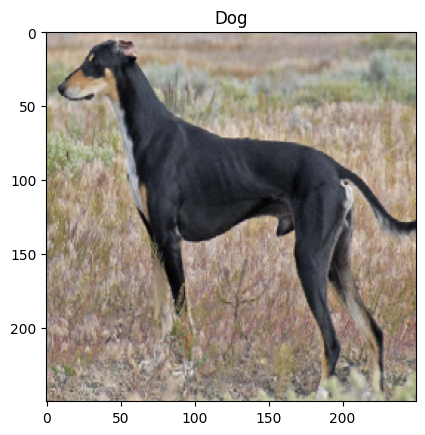

In [15]:
x = 6
plt.title(labels[tf.argmax(label[x])])
plt.imshow(img[x])

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (5,5), activation ='relu', input_shape = (250,250,3)),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(32, (5,5), activation ='relu'),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Conv2D(64, (5,5), activation ='relu'),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(96, activation = "relu"),
    tf.keras.layers.Dense(2, activation = "sigmoid"),
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 246, 246, 16)      1216      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 123, 123, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 119, 119, 32)      12832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 59, 59, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 55, 55, 64)        51264     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 27, 27, 64)       0

In [10]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5) , loss = "categorical_crossentropy", metrics=["accuracy"])

In [11]:
hasil = model.fit(
    train_generator, 
    epochs = 20,    
    validation_data=val_generator,
    )

Epoch 1/20
25/25 [==============================] - 47s 2s/step - loss: 0.6976 - accuracy: 0.4837 - val_loss: 0.6916 - val_accuracy: 0.5000
Epoch 2/20
25/25 [==============================] - 42s 2s/step - loss: 0.6884 - accuracy: 0.4950 - val_loss: 0.6902 - val_accuracy: 0.5150
Epoch 3/20
25/25 [==============================] - 45s 2s/step - loss: 0.6841 - accuracy: 0.5587 - val_loss: 0.6829 - val_accuracy: 0.5300
Epoch 4/20
25/25 [==============================] - 44s 2s/step - loss: 0.6757 - accuracy: 0.6175 - val_loss: 0.6769 - val_accuracy: 0.5750
Epoch 5/20
25/25 [==============================] - 44s 2s/step - loss: 0.6661 - accuracy: 0.6513 - val_loss: 0.6703 - val_accuracy: 0.5950
Epoch 6/20
25/25 [==============================] - 43s 2s/step - loss: 0.6590 - accuracy: 0.6150 - val_loss: 0.6711 - val_accuracy: 0.5350
Epoch 7/20
25/25 [==============================] - 42s 2s/step - loss: 0.6502 - accuracy: 0.6288 - val_loss: 0.6570 - val_accuracy: 0.5950
Epoch 8/20
25/25 [==

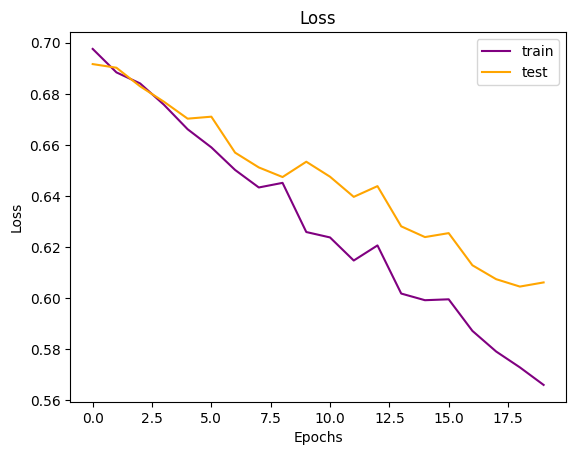

In [12]:
plt.plot(hasil.history["loss"],c = "purple")
plt.plot(hasil.history["val_loss"],c = "orange")
plt.title("Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(["train", "test"])
plt.show()

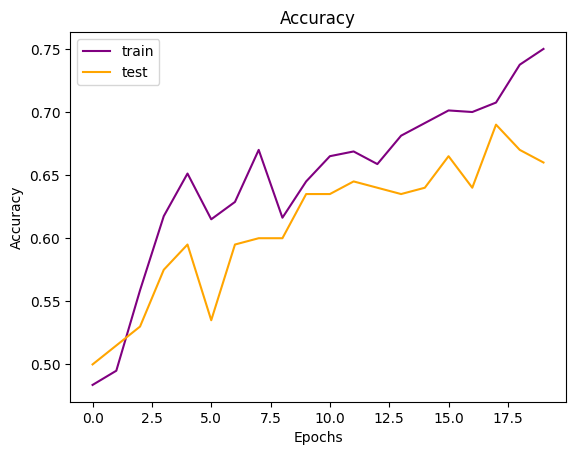

In [13]:
plt.plot(hasil.history["accuracy"],c = "purple")
plt.plot(hasil.history["val_accuracy"],c = "orange")
plt.title("Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(["train", "test"])
plt.show()

In [14]:
print("Akurasi          :", hasil.history["accuracy"][-1] * 100, "%")
print("Akurasi validasi :", hasil.history["val_accuracy"][-1] * 100, "%")

Akurasi          : 75.0 %
Akurasi validasi : 66.00000262260437 %
